# Lesson 6 - Problem Set 3: Analyzing Subway Data
https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/weather_underground.csv

## Useful functions

In [54]:
def input_dir():
    return os.getcwd() + '/data/input/'

def output_dir():
    return os.getcwd() + '/data/output/'

In [55]:
def read_csv_data(filename, input_dir):
    '''
    Receives a file name (csv)
    Returns a DataFrame
    '''
    data = pd.read_csv(input_dir + filename)
    
    #Rename the columns by replacing spaces with underscores and setting all characters to lowercase
    data.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)
    
    return data

In [56]:
def exe_sql_query(data, query):
    '''
    Receives a DataFrame and a String (SQL query)
    Execute SQL query and returns a DataFrame
    '''

    q = """
        {0}
    """.format(query)

    #Execute your SQL command against the pandas frame
    # OBS: case sensitive
    solution = pdsql.sqldf(q, locals())
    return solution

In [57]:
def get_rainy_days(data):
    query = """
        SELECT entriesn_hourly FROM data WHERE rain > 0;
    """

    return exe_sql_query(data, query)

In [58]:
def get_not_rainy_days(data):
    query = """
        SELECT entriesn_hourly FROM data WHERE rain == 0;
    """

    return exe_sql_query(data, query)

## Quiz 1: Exploratory Data Analysis
Before perform any analysis, it might be useful to take a look at the data we're hoping to analyze. More specifically, let's examine the hourly entries in our NYC subway data and determine what distribution the data follows. 

This data is stored in a datafram called turnstile_weather under the ['ENTRIESn_hourly'] column.

* Let's plot two histograms on the same axes to show hourly entries when raining vs. when not raining. 

    * Here's an example on how to plot histograms with pandas and matplotlib:
    
    turnstile_weather['column_to_graph'].hist()
    
You can read a bit about using matplotlib and pandas to plot histograms here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
You can see the information contained within the turnstile weather data here: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

In [59]:
import numpy as np
import pandas as pd
import pandasql as pdsql

%matplotlib inline
import matplotlib.pyplot as plt


import os

In [60]:
def entries_histogram(rainy_data, not_rainy_data):
    
    df = pd.DataFrame({'Rain': rainy_data['entriesn_hourly'], 'No Rain': not_rainy_data['entriesn_hourly']}, columns=['Rain', 'No Rain'])
    
    df.hist()
    df.plot.hist(alpha=0.4)
    df.plot.hist(stacked=True, bins=20)



In [61]:
weather_data = read_csv_data('turnstile-data-master-with_weather.csv',input_dir())
print (weather_data)

        unnamed:_0  unit       daten     timen  hour    descn  \
0                0  R001  2011-05-01  01:00:00     1  REGULAR   
1                1  R001  2011-05-01  05:00:00     5  REGULAR   
2                2  R001  2011-05-01  09:00:00     9  REGULAR   
3                3  R001  2011-05-01  13:00:00    13  REGULAR   
4                4  R001  2011-05-01  17:00:00    17  REGULAR   
5                5  R001  2011-05-01  21:00:00    21  REGULAR   
6                6  R002  2011-05-01  01:00:00     1  REGULAR   
7                7  R002  2011-05-01  05:00:00     5  REGULAR   
8                8  R002  2011-05-01  09:00:00     9  REGULAR   
9                9  R002  2011-05-01  13:00:00    13  REGULAR   
10              10  R002  2011-05-01  17:00:00    17  REGULAR   
11              11  R002  2011-05-01  21:00:00    21  REGULAR   
12              12  R003  2011-05-01  00:00:00     0  REGULAR   
13              13  R003  2011-05-01  04:00:00     4  REGULAR   
14              14  R003 

In [62]:
rainy_data = weather_data[weather_data['rain'] > 0]
not_rainy_data = weather_data[weather_data['rain'] == 0]    
# OR USE SQL (slow):
# rainy_data = get_rainy_days(weather_data)
# not_rainy_data = get_not_rainy_days(weather_data)

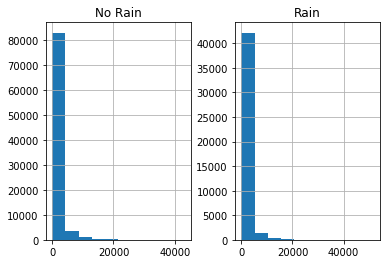

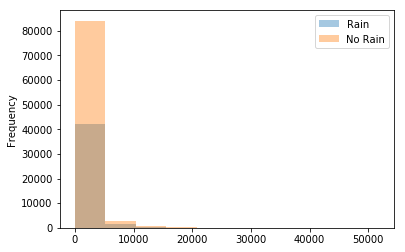

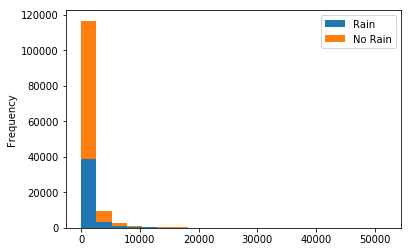

In [63]:
entries_histogram(rainy_data, not_rainy_data)

## Quiz 2: Normally distributed?
No.

## Quiz 3: Mann-Whitney U-Test
This function will consume the turnstile_weather dataframe containing the final turnstile weather data. 
    
Take the means and run the Mann Whitney U-test on the ENTRIESn_hourly column in the turnstile_weather dataframe.
    
This function should return:

    1) the mean of entries with rain
    
    2) the mean of entries without rain
    
    3) the Mann-Whitney U-statistic and p-value comparing the number of entries
       with rain and the number of entries without rain
    
* use scipy's Mann-Whitney implementation
* use numpy's mean function.
    
Here are the functions' documentation:
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
   * http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html

In [64]:
import scipy
import scipy.stats

In [65]:
def mann_whitney_plus_means(rainy_data, not_rainy_data, column):
    with_rain_mean = np.mean(rainy_data[column])
    without_rain_mean = np.mean(not_rainy_data[column])
    mann_whitney = scipy.stats.mannwhitneyu(rainy_data[column], not_rainy_data[column], use_continuity=True, alternative=None)

    U = mann_whitney.statistic
    p = mann_whitney.pvalue
    
    return with_rain_mean, without_rain_mean, U, p 

In [66]:
rainy_data = weather_data[weather_data['rain'] > 0]
not_rainy_data = weather_data[weather_data['rain'] == 0]
    

In [67]:
mann_whitney_results = mann_whitney_plus_means(rainy_data, not_rainy_data, 'entriesn_hourly')
print(mann_whitney_results)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024940392294493356)


### Test Compare (Significance level of 95%)

In [68]:
def test_compare(pvalue, uvalue):
    # ex: pvalue = 5% -> there is a 5% chance of finding a difference (probability of rejecting the null hypothesis when it is true)
    # as large as (or larger than) the one in our study given that the null hypothesis is true
    # A low P value suggests that the sample provides enough evidence that we can reject 
    # the null hypothesis for the entire population.
    # pvalue tells the strength of the evidence

    # With a significance level of 95% 
    if pvalue >= 0.05:
        # No difference
        return ('No difference', (uvalue,pvalue))
    else:
        # There is a difference
        return ('There is a difference', (uvalue,pvalue))

In [69]:
test_compare(mann_whitney_results[3],mann_whitney_results[2])

('There is a difference', (1924409167.0, 0.024940392294493356))

## Quiz 4: Ridership on Rainy vs Nonrainy Days
* Is the distribution of the number of entries statiscally different between rainy & non rainy days?

Yes. Using a singnificance level of 95% is possible to conclude that there is a difference (pvalue = 0.02494 < 0.05).

## Quiz 5: Linear Regression

1) Implement compute_cost()

2) Implement gradient_descent()

3) Select features (in the predictions procedure)

4) Make predictions

In [73]:
import numpy as np
import pandas as pd
import ggplot as ggp

ModuleNotFoundError: No module named 'ggplot'

### Normalize features

In [74]:
def normalize_features(df):
    '''
    Normalize the features in the data set.
    '''
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

### Compute cost

In [80]:
def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for thetas.
    """
    
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)
    
    return cost

### Gradient descent

In [81]:
def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        # update values
        # dot product of the features and theta
        predicted_values = np.dot(features, theta)
        # update theta
        theta = theta - alpha / m * np.dot((predicted_values - values), features)
        
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    
    return theta, pd.Series(cost_history)  

### Predictions 

The NYC turnstile data is stored in a pandas dataframe called weather_turnstile. Using the information stored in the dataframe, let's predict the ridership of the NYC subway using linear regression with gradient descent.
    
* You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
* The prediction should have a R^2 value of 0.40 or better.

* You need to experiment using various input features contained in the dataframe. 
 
* We recommend that you don't use the EXITSn_hourly feature as an input to the linear model because we cannot use it as a predictor: we cannot use exits counts as a way to predict entry counts. 

In [78]:

def predictions(dataframe):
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    # plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


### Plot

In [79]:
def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )
